***Exercise 5-1***

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [2]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [3]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [4]:
dist.mean(), dist.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [5]:
dist.cdf(mu-sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [8]:
# Googled conversion of heights into centimeters (5'10" = 177.8 , 6'1" = 185.4), then create variables for them.
beginning_height = 177.8
ending_height = 185.4

In [9]:
# Find the percentile rank for the beginning height
beginning_per = dist.cdf(beginning_height)
beginning_per

0.48963902786483265

In [10]:
# Find the percentile rank for the ending height
ending_per = dist.cdf(ending_height)
ending_per

0.8317337108107857

In [11]:
# Calculate the percentile rank that is in between the two
ending_per - beginning_per

0.3420946829459531

In [ ]:
# Answer = Approx 34.2% of men are within the right height range to be in the blue man group. 

***Exercise 5-2***

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [ ]:
# import libraries from book for plotting a pareto distribution
import thinkstats2
import thinkplot

In [12]:
alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

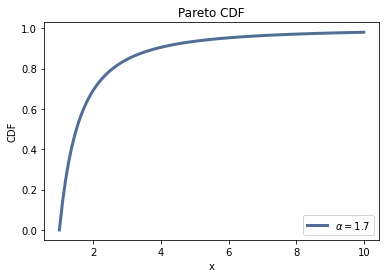

In [14]:
# Plot the pareto distribution
xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

What is the mean height in Pareto world?

In [16]:
# Find the mean height of the dist object
mu = dist.mean()
mu

2.428571428571429

What fraction of people are shorter than the mean?

In [18]:
# Calculate the percentile rank of the mean
mu_per = dist.cdf(mu)
mu_per

0.778739697565288

In [ ]:
# Answer = 77.9% of people are shorter than the mean

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [21]:
# obvious anwer is none, but calculate it with code
giants = dist.sf(1000)
giants

7.943282347242817e-06

In [26]:
# Apparently out of 7 billion people, we can expect approx 55603 of them to be giants
giants * 7e9

55602.97643069972

How tall do we expect the tallest person to be?

In [24]:
dist.max()

AttributeError: 'rv_frozen' object has no attribute 'max'

In [28]:
# Darn, was hoping that would work. I had to look in the book for this one. The second answer made more sense to me
# because the first one seemed like you would just guess a number and test until you got close to one. So, i took the 
# inverse of the cdf and then calculated the height in meters that corresponds to the probability of 1 in 7 billion.

super_mega_giant = dist.ppf(1 - 1/7e9)
super_mega_giant

618349.6106759505